In [13]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os
import cv2

%matplotlib inline

# Color Selection

In [2]:
image = mpimg.imread('test.jpg')

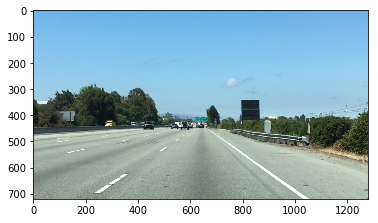

In [3]:
plt.imshow(image)

In [4]:
###### MODIFY THESE VARIABLES TO MAKE YOUR COLOR SELECTION
red_threshold = 200
green_threshold = 200
blue_threshold = 200
######

rgb_threshold = [red_threshold, green_threshold, blue_threshold]

In [5]:
color_select = np.copy(image)

In [6]:
color_thresholds = (image[:,:,0] < rgb_threshold[0]) \
             | (image[:,:,1] < rgb_threshold[1]) \
             | (image[:,:,2] < rgb_threshold[2])

In [7]:
color_thresholds.shape

(720, 1280)

In [ ]:
color_select[color_thresholds] = (0, 0, 0)

In [ ]:
plt.imshow(color_select)

# Region Masking

In [ ]:
ysize, xsize, _ = image.shape

In [ ]:
image.shape

In [ ]:
region_select = image.copy()

In [ ]:
left_bottom = [0, ysize]
right_bottom = [xsize, ysize]
apex = [xsize/2, 320]

In [ ]:
# Fit lines (y=Ax+B) to identify the  3 sided region of interest
# np.polyfit() returns the coefficients [A, B] of the fit
fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)

In [ ]:
# Find the region inside the lines
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))

In [ ]:
region_threshold = \
(YY > (XX * fit_left[0] + fit_left[1])) & \
(YY > (XX * fit_right[0] + fit_right[1])) & \
(YY < (XX * fit_bottom[0] + fit_bottom[1]))

In [ ]:
plt.imshow(region_threshold, cmap='gray')

In [ ]:
region_select[region_threshold] = (255, 0, 0)

In [ ]:
plt.imshow(region_select)

# Color and Region combined

In [ ]:
line_image = np.copy(image)

In [ ]:
color_select = np.copy(image)

In [ ]:
color_select[color_thresholds | ~region_threshold] = [0, 0, 0]

In [ ]:
line_image[~color_thresholds & region_threshold] = (255, 0, 0)

In [ ]:
plt.imshow(line_image)

# Canny Edge Detection

In [ ]:
# filename = 'exit-ramp.jpg'
filename = 'solidWhiteRight.jpg'

In [ ]:
image = mpimg.imread(filename)

In [ ]:
plt.imshow(image)

In [ ]:
image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

In [ ]:
plt.imshow(image, cmap='gray')

In [ ]:
kernel_size = 5

In [ ]:
blur_gray = cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)

In [ ]:
low_threshold, high_threshold = 100, 200

In [ ]:
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

In [ ]:
plt.imshow(edges, cmap='Greys_r')

In [ ]:
cv2.imwrite('edges.png', edges)

# Hough Transform to find Lane Lines

https://alyssaq.github.io/2014/understanding-hough-transform/

In [ ]:
image = mpimg.imread(filename)

In [ ]:
rho = 1
theta = np.pi/180
threshold = 10
min_line_length = 10
max_line_gap = 25
line_image = np.copy(image)*0 #creating a blank to draw lines on

In [ ]:
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]), min_line_length, max_line_gap)

In [ ]:
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)

In [ ]:
# Create a "color" binary image to combine with line image
color_edges = np.dstack((edges, edges, edges))

In [ ]:
combo = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0)

In [ ]:
plt.imshow(combo)

In [ ]:
cv2.imwrite('hough.png', combo)

In [ ]:
imshape = image.shape

In [ ]:
mask = np.zeros_like(edges)
ignore_mask_color = 255 

In [ ]:
# vertices = np.array([[(485, 270), (480,270), (80,imshape[0]), (imshape[1]-80, imshape[0])]], dtype=np.int32)
vertices = np.array([[(450, 320), (550,320), (850,imshape[0]), (150, imshape[0])]], dtype=np.int32)

In [ ]:
_ = cv2.fillPoly(mask, vertices, ignore_mask_color)

In [ ]:
masked_edges = cv2.bitwise_and(edges, mask)

In [ ]:
plt.imshow(masked_edges, cmap='gray')

In [ ]:
lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]), min_line_length, max_line_gap)

In [ ]:
line_image = np.copy(image)*0

In [ ]:
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)

In [ ]:
lines_edges = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0) 

In [ ]:
plt.imshow(lines_edges)

In [ ]:
t = np.zeros_like(image)
_ = cv2.fillPoly(t, np.array([[(50, 50), (400, 50), (400, 400), (50,400)]]), (255, 255, 255))
plt.imshow(cv2.bitwise_and(image, t))

In [ ]:
plt.imshow(t, cmap='gray')

In [ ]:
cv2.imwrite()

In [ ]:
os.listdir()

# Pipeline for finding lanes 

In [14]:
filename = 'whiteCarLaneSwitch.jpg'

In [15]:
image = mpimg.imread(filename)

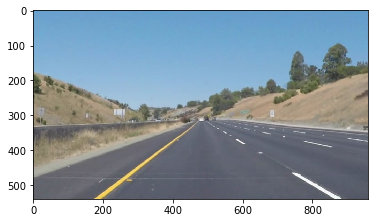

In [16]:
plt.imshow(image)

In [17]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [18]:
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

In [19]:
yellow_rgb = np.array([[[255, 255, 0]]], dtype="uint8")
yellow_hsv = cv2.cvtColor(yellow_rgb, cv2.COLOR_BGR2HSV)[0,0,:]
print(yellow_hsv)

[ 90 255 255]


In [20]:
lower_yellow = np.array([yellow_hsv[0]-10, 100, 100], dtype="uint8")
upper_yellow = np.array([yellow_hsv[0]+10, 255, 255], dtype="uint8")

mask_yellow = cv2.inRange(image_hsv, lower_yellow, upper_yellow)
mask_white = cv2.inRange(image_gray, 200, 255)

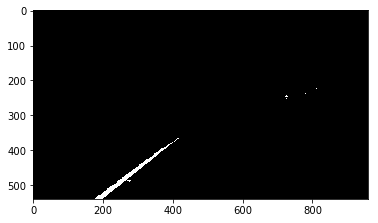

In [21]:
plt.imshow(mask_yellow, cmap='gray')

In [22]:
mask = cv2.bitwise_or(mask_yellow, mask_white)

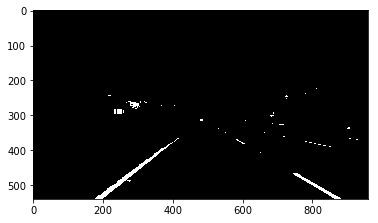

In [23]:
plt.imshow(mask, cmap='gray')

In [24]:
image_masked = cv2.bitwise_and(image_gray, mask)

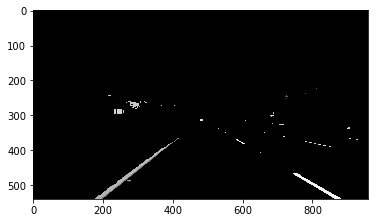

In [25]:
plt.imshow(image_masked, cmap='gray')

In [26]:
imshape = image.shape
vertices = np.array([[(450, 320), (550,320), (950,imshape[0]), (80, imshape[0])]], dtype=np.int32)

In [27]:
image_blur = cv2.GaussianBlur(image_masked, (5, 5), 0)

In [28]:
low_threshold, high_threshold = 50, 150

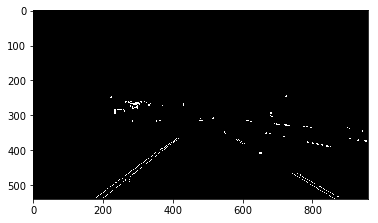

In [29]:
image_edges = cv2.Canny(image_blur, low_threshold, high_threshold); plt.imshow(image_edges, cmap='gray')

In [30]:
def region_of_interest(img, vertices):
    """
    Applies an image mask.
    
    Only keeps the region of the image defined by the polygon
    formed from `vertices`. The rest of the image is set to black.
    """
    #defining a blank mask to start with
    mask = np.zeros_like(img)   
    
    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
        
    #filling pixels inside the polygon defined by "vertices" with the fill color    
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image, mask


In [31]:
masked_image, roi = region_of_interest(image_edges, vertices)

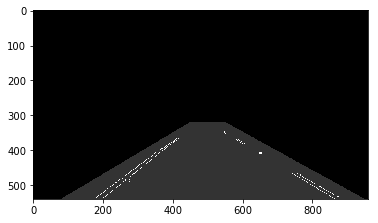

In [32]:
plt.imshow(cv2.addWeighted(masked_image, 1, roi, 0.2, 1), cmap='gray')

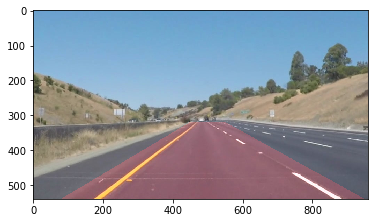

In [33]:
roi_red = np.dstack([roi, np.zeros_like(image_gray), np.zeros_like(image_gray)])
plt.imshow(cv2.addWeighted(image, 1, roi_red, 0.2, 1))

In [34]:
def extrapolate_y(x, x1, y1, x2, y2):
    y = y1 + (x - x1) * float(y2 - y1)/float(x2 - x1)
    return x, y
def extrapolate(y, x1, y1, x2, y2):
    x = x1 + (y - y1) * float(x2 - x1)/float(y2 - y1)
    return x, y
# def extrapolate_x_right(y, x1, y1, x2, y2):
#     x = x1 + (y - y1) * float(x2-x1)/float(y2-y1)
#     return x, y

In [35]:
# def extrapolate(Y, line):
#     x1,y1,x2,y2 = line
#     theta = np.arctan2(abs(y2-y1), x2-x1) # * 180. / np.pi
# #     print(theta)
#     H = Y - min(y1,y2)
#     d = H/np.tan(theta)
#     return d

In [36]:
line_cache = []

In [53]:
def draw_lines(img, lines, color=[255, 0, 0], thickness=2):
    global line_cache

    height, width = image.shape[0], image.shape[1]
    
    # arrays to hold all left and right lines
    left_lines, right_lines = [], []

    for line in lines:
        for x1,y1,x2,y2 in line:
            # compute slope and intercept
            slope = float(y2-y1)/(x2-x1)
            b = (y2-y1)/2 - slope * (x2-x2)/2
            
            # if slope is negative, we have a line on the "LEFT" 
            if slope < 0: 
                left_lines.append(line)
            # otherwise if slope is positive, we have a line on the "RIGHT"
            elif slope > 0:
                right_lines.append(line)

    left_line_mean = np.mean(np.array(left_lines), axis=0).flatten()
    right_line_mean = np.mean(np.array(right_lines), axis=0).flatten()
    
    # if we have both lines
    if len(left_lines) > 0 and len(right_lines) > 0:
        x1, y1, x2, y2 = left_line_mean
        # find the intersection point with image border
        x_bottom, y_bottom = extrapolate(height, x1, y1, x2, y2)
        
        # find the intersection point with the region of interest top border
        x_top, y_top = extrapolate(320, x1, y1, x2, y2)

        # define the extrapolated line by extending to the image border from the bottom and 
        # to the ROI border on the top
        line_left = (int(x_bottom), int(y_bottom), int(x_top), int(y_top))
        
        x1, y1, x2, y2 = right_line_mean
        
        # find the intersection point with image border
        x_bottom, y_bottom = extrapolate(height, x1, y1, x2, y2)
        
        # find the intersection point with the region of interest top border
        x_top, y_top  = extrapolate(320, x1, y1, x2, y2)

        line_right = (int(x_bottom), int(y_bottom), int(x_top), int(y_top))
        
        line_cache.append((line_left, line_right))    
        
    # only keep the lines for the last 30 frames for averaging
    if (len(line_cache) > 30):
        line_cache = line_cache[-30:]

    left_lines = list(map(lambda k: k[0], line_cache))
    right_lines = list(map(lambda k: k[1], line_cache))
    
    # average the last 30 left lines in the frames for stability
    line = np.mean(np.array(left_lines), axis=0).astype(np.uint32).flatten()

    # draw the left line
    cv2.line(img, (line[0], line[1]), (line[2], line[3]), color, 10)

    # average the last 30 right lines in the frames for stability
    line = np.mean(np.array(right_lines), axis=0).astype(np.uint32).flatten()

    # draw the right line
    cv2.line(img, (line[0], line[1]), (line[2], line[3]), color, 10)

In [54]:
# def draw_lines(img, lines, color=[255, 0, 0], thickness=2):
#     global frame_lines_left
#     global frame_lines_right
    
#     Y, X = image.shape[0], image.shape[1]
#     left_slope = 0
#     right_slope = 0
#     left_inter = 0
#     right_inter = 0
#     left, left_slope = [], []
#     right, right_slope = [], []

#     for line in lines:
#         for x1,y1,x2,y2 in line:
#             slope = float(y2-y1)/(x2-x1)
#             b = (y2-y1)/2 - slope * (x2-x2)/2
#             if slope < 0: # left
#                 left_slope.append(slope)
#                 left_inter += b
#                 left.append(line)
#             elif slope > 0:
# #                 print(line)
#                 right_slope.append(slope)
#                 right_inter += b
#                 right.append(line)
#             else:
#                 print('a')
#             #cv2.line(img, (x1, y1), (x2, y2), color, thickness)
    
# #     print('zl ')
# #     print(np.mean(np.array(left), axis=0))
# #     print('zr ')
# #     print(np.mean(np.array(right), axis=0))
#     zl = np.mean(np.array(left), axis=0).flatten()
#     zr = np.mean(np.array(right), axis=0).flatten()
    
# #     theta = -np.arctan2((zl[3]-zl[1]),(zl[2]-zl[0])) * 180. / np.pi
# #     print(theta)
# #     H = zl[3]
# #     d = H/np.tan(theta)
# #     xp = zl[2] - d
#      # xp = zl[0] - extrapolate(Y, zl)
#     if len(left) > 0:
#         x1, y1, x2, y2 = zl
#         xp, yp = extrapolate_x(Y, x1, y1, x2, y2)
#         xx, _ = extrapolate_x(320, x1, y1, x2, y2)

#         line = (int(xp), Y, int(xx), int(320))
#         frame_lines_left.append(line)
    
#     if (len(frame_lines_left) > 30):
#         frame_lines_left = frame_lines_left[-30:]

#     line = np.mean(np.array(frame_lines_left), axis=0).astype(np.uint32).flatten()
#     print(line)
    
# #     cv2.line(img, (zl[0], zl[1]), (zl[2], zl[3]), [255,0,0], 10)
#     cv2.line(img, (line[0], line[1]), (line[2], line[3]), [255,0,0], 10)
    
# #     xp = zr[0] - extrapolate(Y, zr)
#     if (len(right) > 0):
#         x1, y1, x2, y2 = zr
#         xp, yp = extrapolate_x(Y, x1, y1, x2, y2)
#         xx, _  = extrapolate_x(320, x1, y1, x2, y2)
#     #     print(zr)
#     #     print(xp, yp)
#         line = (int(xp), Y, int(xx), int(320))

#         frame_lines_right.append(line)
        
#     if (len(frame_lines_right) > 30):
#         frame_lines_right = frame_lines_right[-30:]
#     line = np.mean(np.array(frame_lines_right), axis=0).astype(np.uint32).flatten()
# #     print(z)
# #     x, y = extrapolate_x(Y, z[0], z[1], z[2], z[3])
# #     print(x, y)
#     cv2.line(img, (line[0], line[1]), (line[2], line[3]), [255, 0,0], 10)

In [55]:
def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap):
    """
    `img` should be the output of a Canny transform.
        
    Returns an image with hough lines drawn.
    """
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)    
    line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    draw_lines(line_img, lines)
    return line_img

In [56]:
threshold_map = {
    'solidWhiteCurve.jpg': 10,
    'solidWhiteRight.jpg': 10,
    'solidYellowCurve.jpg': 30,
    'solidYellowCurve2.jpg': 30,
    'solidYellowLeft.jpg': 10,
    'whiteCarLaneSwitch.jpg': 10
}

In [57]:
rho = 4
theta = np.pi/180
threshold = threshold_map[filename]
min_line_length = 100
max_line_gap = 180

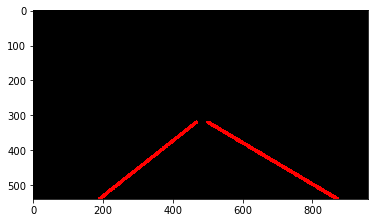

In [58]:
line_cache = []
line_image = hough_lines(masked_image, rho, theta, threshold, min_line_length, max_line_gap)
plt.imshow(line_image)

In [59]:
final = cv2.addWeighted(image, 0.8, line_image, 1, 0)

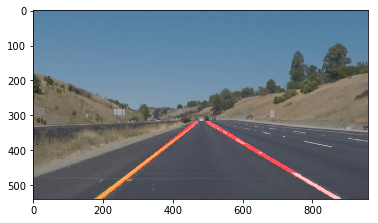

In [60]:
plt.imshow(final)

# Videos

In [61]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [62]:
clip1 = VideoFileClip("solidWhiteRight.mp4")

In [63]:
def process_image(image):
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    mask_yellow = cv2.inRange(image_hsv, lower_yellow, upper_yellow)
    mask_white = cv2.inRange(image_gray, 200, 255)

    mask = cv2.bitwise_or(mask_yellow, mask_white)

    image_masked = cv2.bitwise_and(image_gray, mask)

    image_blur = cv2.GaussianBlur(image_masked, (5, 5), 0)

    image_edges = cv2.Canny(image_blur, low_threshold, high_threshold)    

    masked_image, roi = region_of_interest(image_edges, vertices)

    rho = 4
    theta = np.pi/180
    threshold = 10
    min_line_length = 100
    max_line_gap = 180

    line_image = hough_lines(masked_image, rho, theta, threshold, min_line_length, max_line_gap)

    result = cv2.addWeighted(image, 0.8, line_image, 1, 0)
    
    return result

[MoviePy] >>>> Building video test_videos_output/solidWhiteRight.mp4
[MoviePy] Writing video test_videos_output/solidWhiteRight.mp4


100%|█████████▉| 221/222 [00:04<00:00, 54.96it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_videos_output/solidWhiteRight.mp4 

CPU times: user 4.82 s, sys: 529 ms, total: 5.35 s
Wall time: 4.44 s


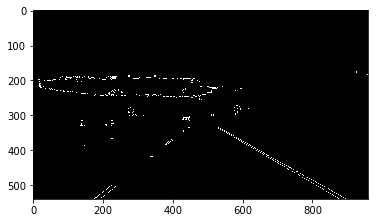

In [64]:
line_cache = []
white_output = 'test_videos_output/solidWhiteRight.mp4'
if not os.path.exists('test_videos_output'): os.mkdir('test_videos_output')
white_clip = clip1.fl_image(process_image)
%time white_clip.write_videofile(white_output, audio=False)

In [ ]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))

[MoviePy] >>>> Building video test_videos_output/solidYellowLeft.mp4
[MoviePy] Writing video test_videos_output/solidYellowLeft.mp4


100%|█████████▉| 681/682 [00:13<00:00, 51.97it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_videos_output/solidYellowLeft.mp4 

CPU times: user 15 s, sys: 1.49 s, total: 16.5 s
Wall time: 13.6 s


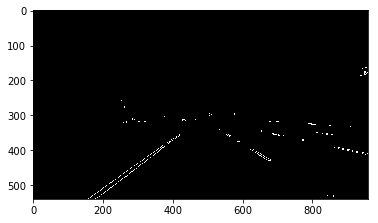

In [65]:
line_cache = []

yellow_output = 'test_videos_output/solidYellowLeft.mp4'
clip2 = VideoFileClip('solidYellowLeft.mp4')
yellow_clip = clip2.fl_image(process_image)
%time yellow_clip.write_videofile(yellow_output, audio=False)

In [ ]:
challenge_output = 'test_videos_output/challenge.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip3 = VideoFileClip('test_videos/challenge.mp4').subclip(0,5)
clip3 = VideoFileClip('challenge.mp4')
challenge_clip = clip3.fl_image(process_image)
%time challenge_clip.write_videofile(challenge_output, audio=False)